In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point


In [2]:
listings = pd.read_csv('listings.csv')

In [3]:
listings.shape

(15500, 75)

In [4]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69810,https://www.airbnb.com/rooms/69810,20241214051419,2024-12-15,previous scrape,"Live Beneath Live Oaks in a Bright, Intimate H...",Curl up with a book on the comfy window seat o...,"Located in the cool Dawson area, about two mil...",https://a0.muscache.com/pictures/65d0d66a-9765...,82762,...,4.99,4.80,4.95,NaN,f,1,1,0,0,2.65
1,70812,https://www.airbnb.com/rooms/70812,20241214051419,2024-12-15,city scrape,1 Bedroom Apt; Above the Studio,I do not book more then 4-6 weeks in advance. ...,We are the first block off of Congress. Easy ...,https://a0.muscache.com/pictures/9cb23da9-de8b...,268988,...,4.92,4.95,4.82,NaN,f,1,1,0,0,1.12
2,72833,https://www.airbnb.com/rooms/72833,20241214051419,2024-12-15,previous scrape,"Private, Detached Cottage with Full Kitchen",Private cottage with self check-in. Hosts liv...,Peaceful neighborhood street in central Austin...,https://a0.muscache.com/pictures/miso/Hosting-...,378744,...,4.96,4.90,4.91,NaN,f,1,1,0,0,2.47
3,73005,https://www.airbnb.com/rooms/73005,20241214051419,2024-12-14,city scrape,3BR Convenient Gated Townhome w/ Pool Access!,"1500 sq ft gated, two-story townhome in a quie...",NaN,https://a0.muscache.com/pictures/503318/89e15c...,128514,...,4.95,4.80,4.77,NaN,f,1,1,0,0,0.27
4,73289,https://www.airbnb.com/rooms/73289,20241214051419,2024-12-15,city scrape,Simple 2/2 in Central Austin,NaN,It's a student area but still has a pretty goo...,https://a0.muscache.com/pictures/555805/1e4c93...,382510,...,4.93,4.92,4.92,NaN,f,2,2,0,0,0.37


In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [7]:
print("\nMissing values per column:")
print(listings.isnull().sum())



Missing values per column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2952
Length: 75, dtype: int64


In [8]:
# Calculate percentage of missing values
print("\nPercentage of missing values:")
perc = round(listings.isnull().sum() / len(listings), 2) * 100

# Filter and display columns with missing values
missing_columns = perc[perc > 0]
print(missing_columns)


Percentage of missing values:
description                       2.0
neighborhood_overview            45.0
host_location                    15.0
host_about                       38.0
host_response_time               27.0
host_response_rate               27.0
host_acceptance_rate             22.0
host_is_superhost                 3.0
host_neighbourhood               11.0
neighbourhood                    45.0
neighbourhood_group_cleansed    100.0
bathrooms                        27.0
bedrooms                          6.0
beds                             27.0
price                            27.0
calendar_updated                100.0
has_availability                  8.0
first_review                     19.0
last_review                      19.0
review_scores_rating             19.0
review_scores_accuracy           19.0
review_scores_cleanliness        19.0
review_scores_checkin            19.0
review_scores_communication      19.0
review_scores_location           19.0
review_scores_value

In [9]:
listings = listings.drop(columns=['neighbourhood_group_cleansed', 'calendar_updated','license'])

In [10]:
listings['neighborhood_overview'] = listings['neighborhood_overview'].fillna("Not provided")
listings['host_about'] = listings['host_about'].fillna("Not provided")
listings['host_neighbourhood'] = listings['host_neighbourhood'].fillna("Unknown")
listings['neighbourhood']=listings['neighbourhood'].fillna('Unknown')
listings['host_location'] = listings['host_location'].fillna("Unknown")
listings['host_response_time'] = listings['host_response_time'].fillna("Not specified")
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mode()[0])
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mode()[0])
listings['description'] = listings['description'].fillna("No description")
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].median())
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].median())
listings['beds'] = listings['beds'].fillna(listings['beds'].median())


In [11]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['price'] = listings['price'].fillna(listings['price'].median())


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\23519\AppData\Local\Temp\ipykernel_33480\421984818.py:1: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)


In [12]:
listings['first_review'] = pd.to_datetime(listings['first_review'], errors='coerce')
listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')

In [13]:
review_columns = ['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_location', 'review_scores_value', 'reviews_per_month']
for col in review_columns:
    listings[col] = listings[col].fillna(listings[col].median())

# Verify missing values after imputation
print("\nMissing values after imputation:")
print(listings.isnull().sum())


Missing values after imputation:
id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 72, dtype: int64


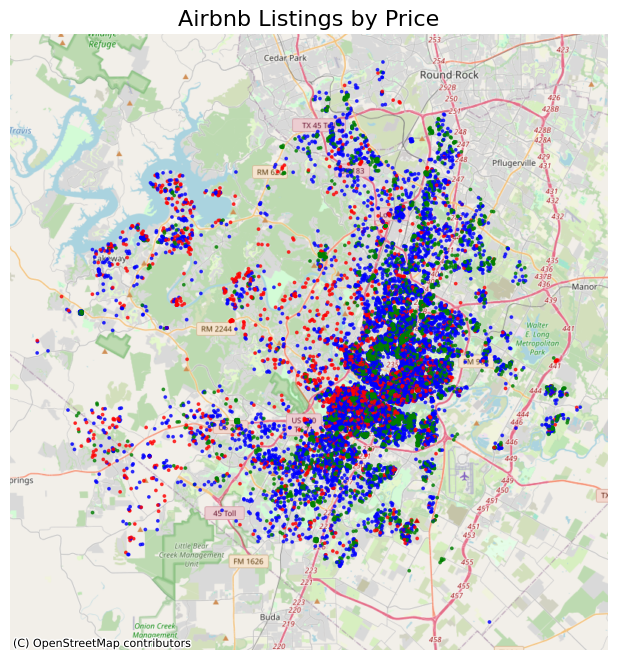

In [14]:
listings['geometry'] = [Point(xy) for xy in zip(listings['longitude'], listings['latitude'])]
gdf = gpd.GeoDataFrame(listings, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

gdf['color'] = gdf['price'].apply(lambda p: 'green' if p < 100 else 'blue' if p < 250 else 'red')

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=3, alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Airbnb Listings by Price", fontsize=16)
ax.set_axis_off()
plt.show()

In [15]:
listings['price'].describe()

count    15500.000000
mean       233.854774
std        734.155586
min         10.000000
25%        100.000000
50%        134.000000
75%        185.000000
max      38143.000000
Name: price, dtype: float64

### Outliers

In [16]:
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = listings[(listings['price'] < lower_bound) | (listings['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")
print("\nOutlier prices:")
print(outliers['price'].describe())
listings_cleaned = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]


Number of outliers in 'price': 1832

Outlier prices:
count     1832.000000
mean      1000.827511
std       1967.447875
min        313.000000
25%        394.000000
50%        500.000000
75%        800.000000
max      38143.000000
Name: price, dtype: float64


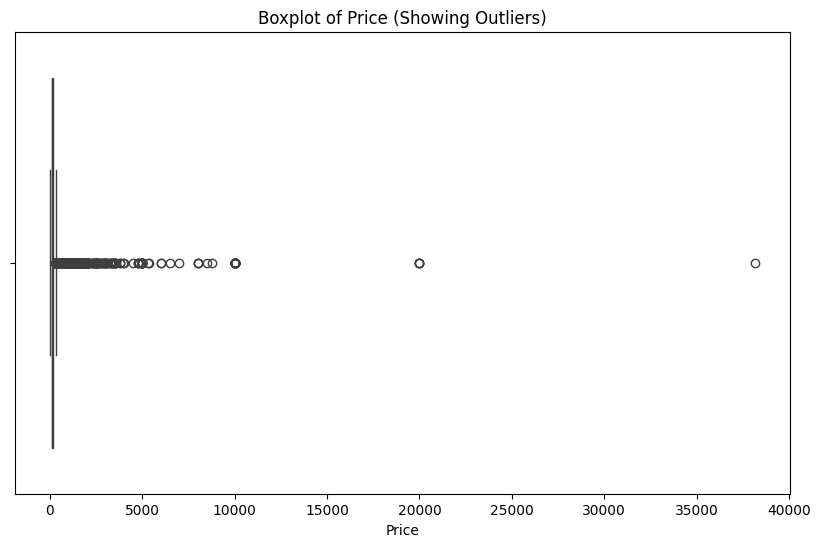

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=listings['price'])
plt.title('Boxplot of Price (Showing Outliers)')
plt.xlabel('Price')
plt.show()

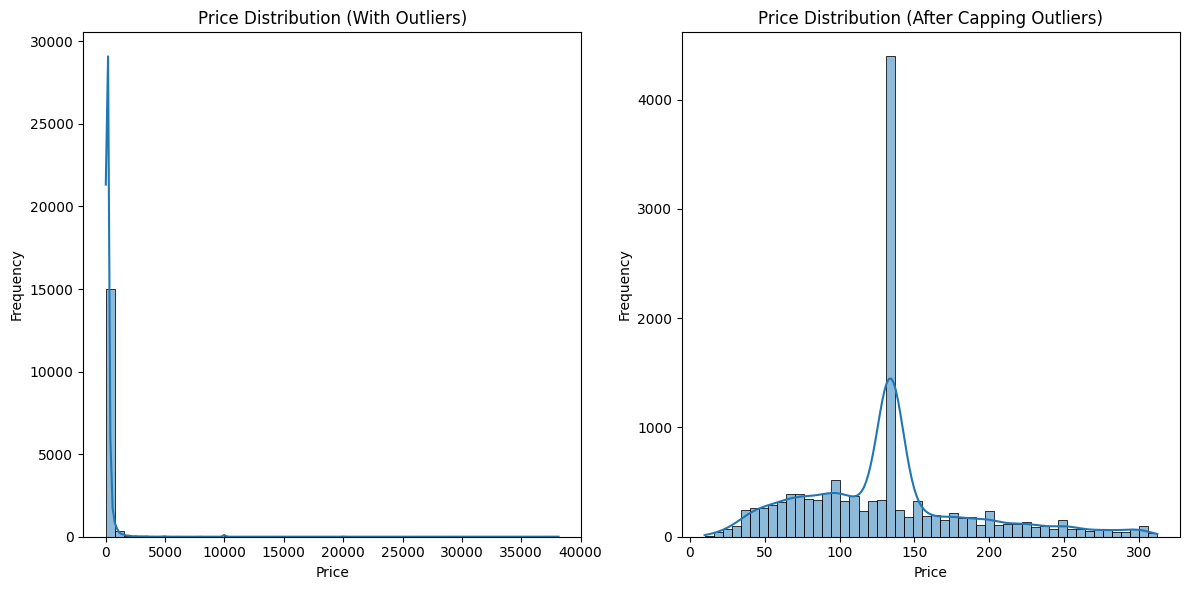

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

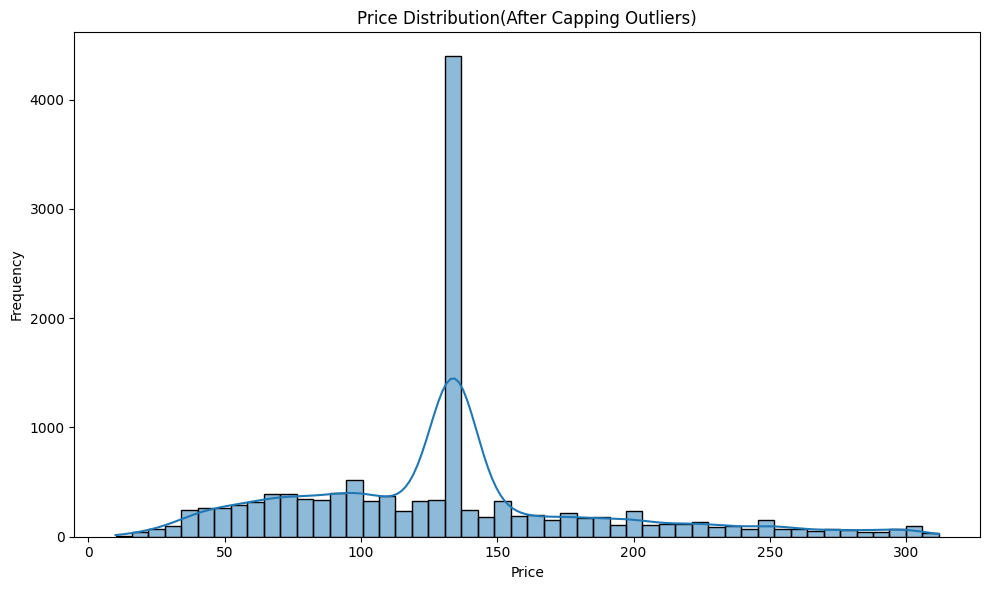

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(listings_cleaned['price'],bins=50,kde=True)
plt.title('Price Distribution(After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

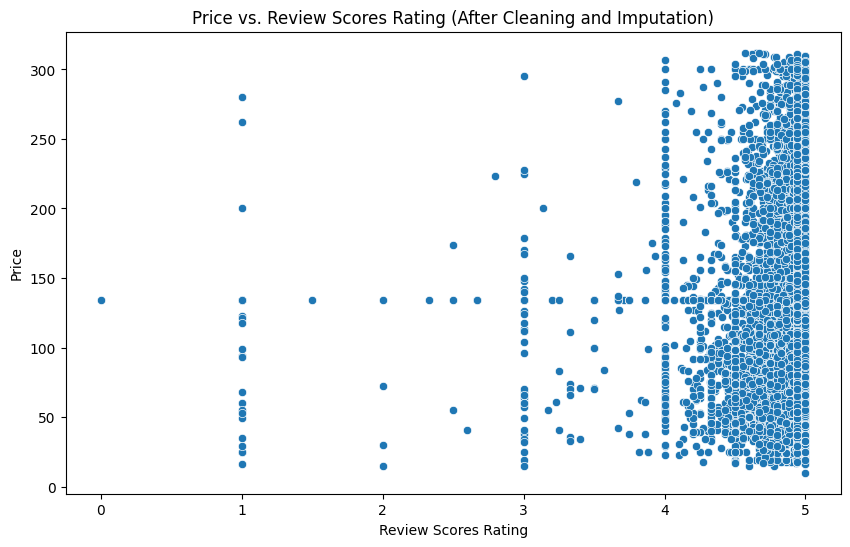

In [20]:
# Price vs. Review Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=listings_cleaned)
plt.title('Price vs. Review Scores Rating (After Cleaning and Imputation)')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

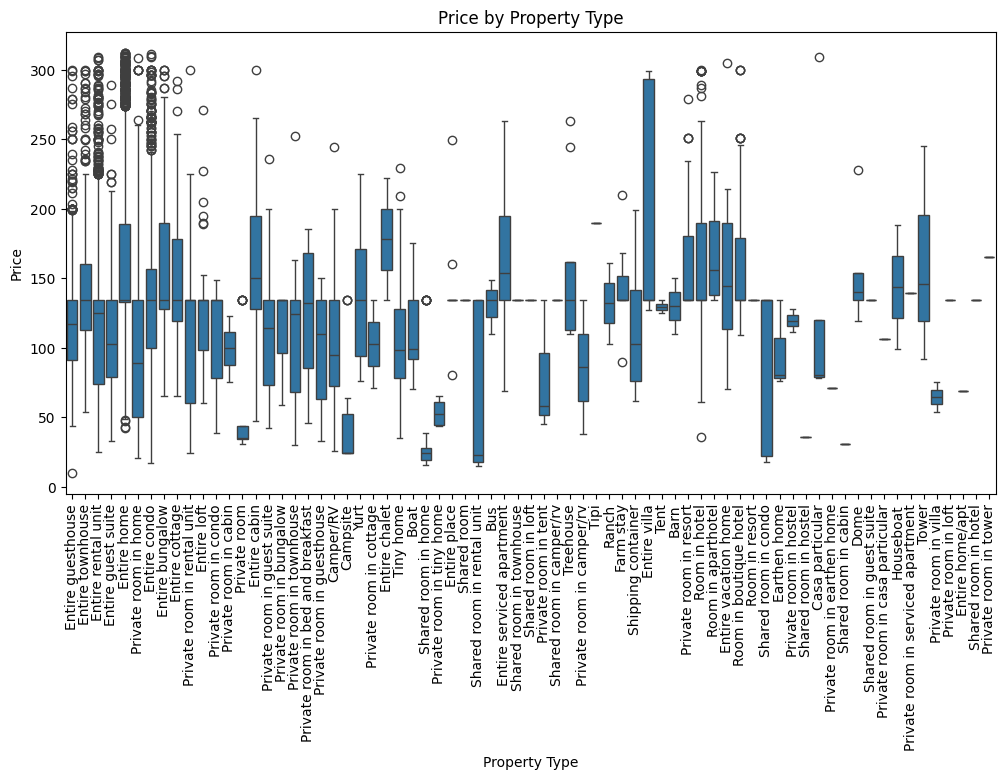

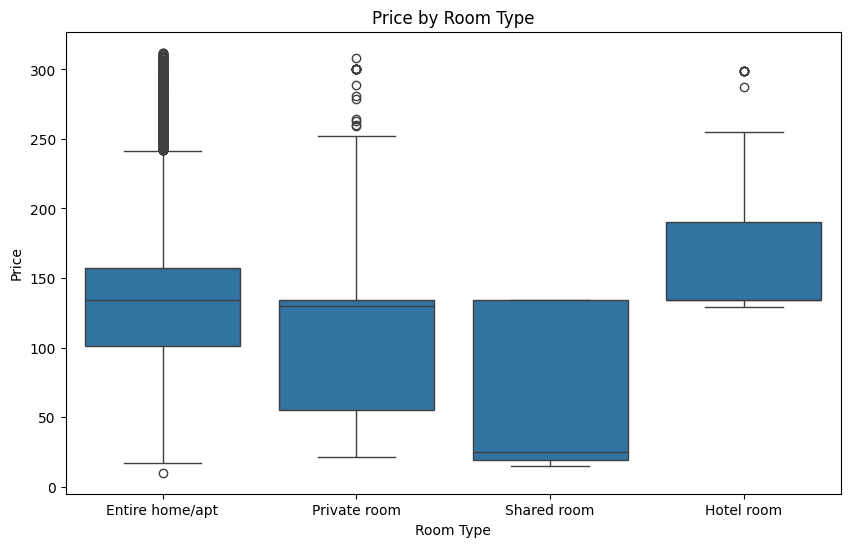

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=listings_cleaned)
plt.title('Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_cleaned)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [22]:
import numpy as np

def calculate_bins(data, method='sturges'):
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [23]:
sbins       = calculate_bins(listings_cleaned.price , method = 'sturges')
sqrt_bins   = calculate_bins(listings_cleaned.price , method = 'sqrt')
fd_bins     = calculate_bins(listings_cleaned.price , method = 'fd')

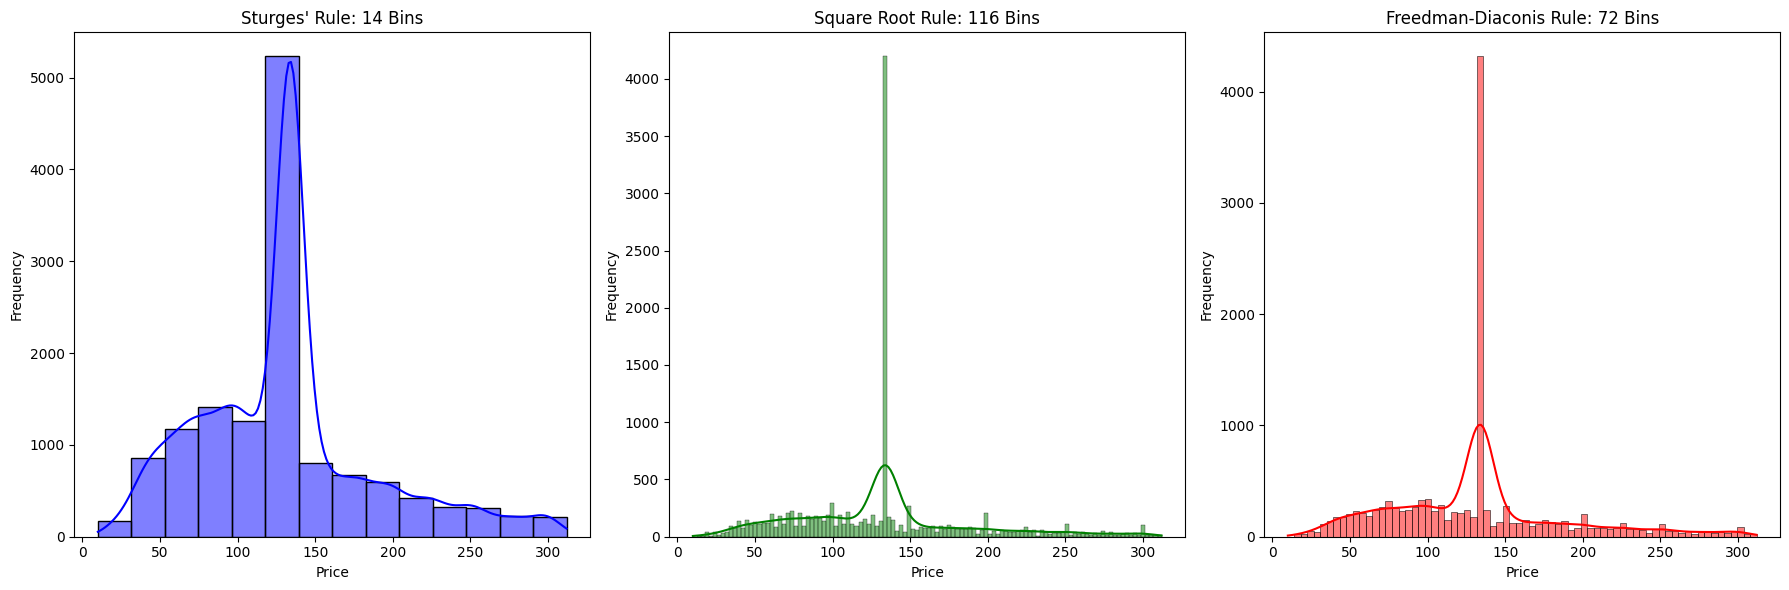

In [24]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(listings_cleaned.price, bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(listings_cleaned.price, bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(listings_cleaned.price, bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()



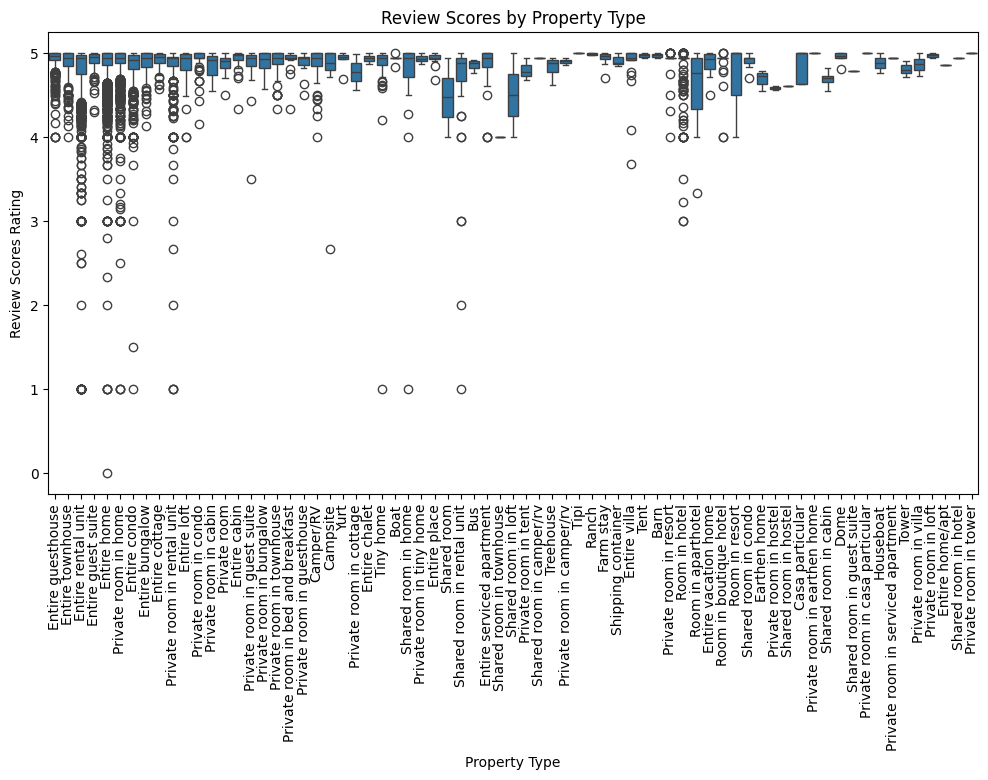

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='review_scores_rating', data=listings_cleaned)
plt.title('Review Scores by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Review Scores Rating')
plt.xticks(rotation=90)
plt.show()

## Multivariate analysis

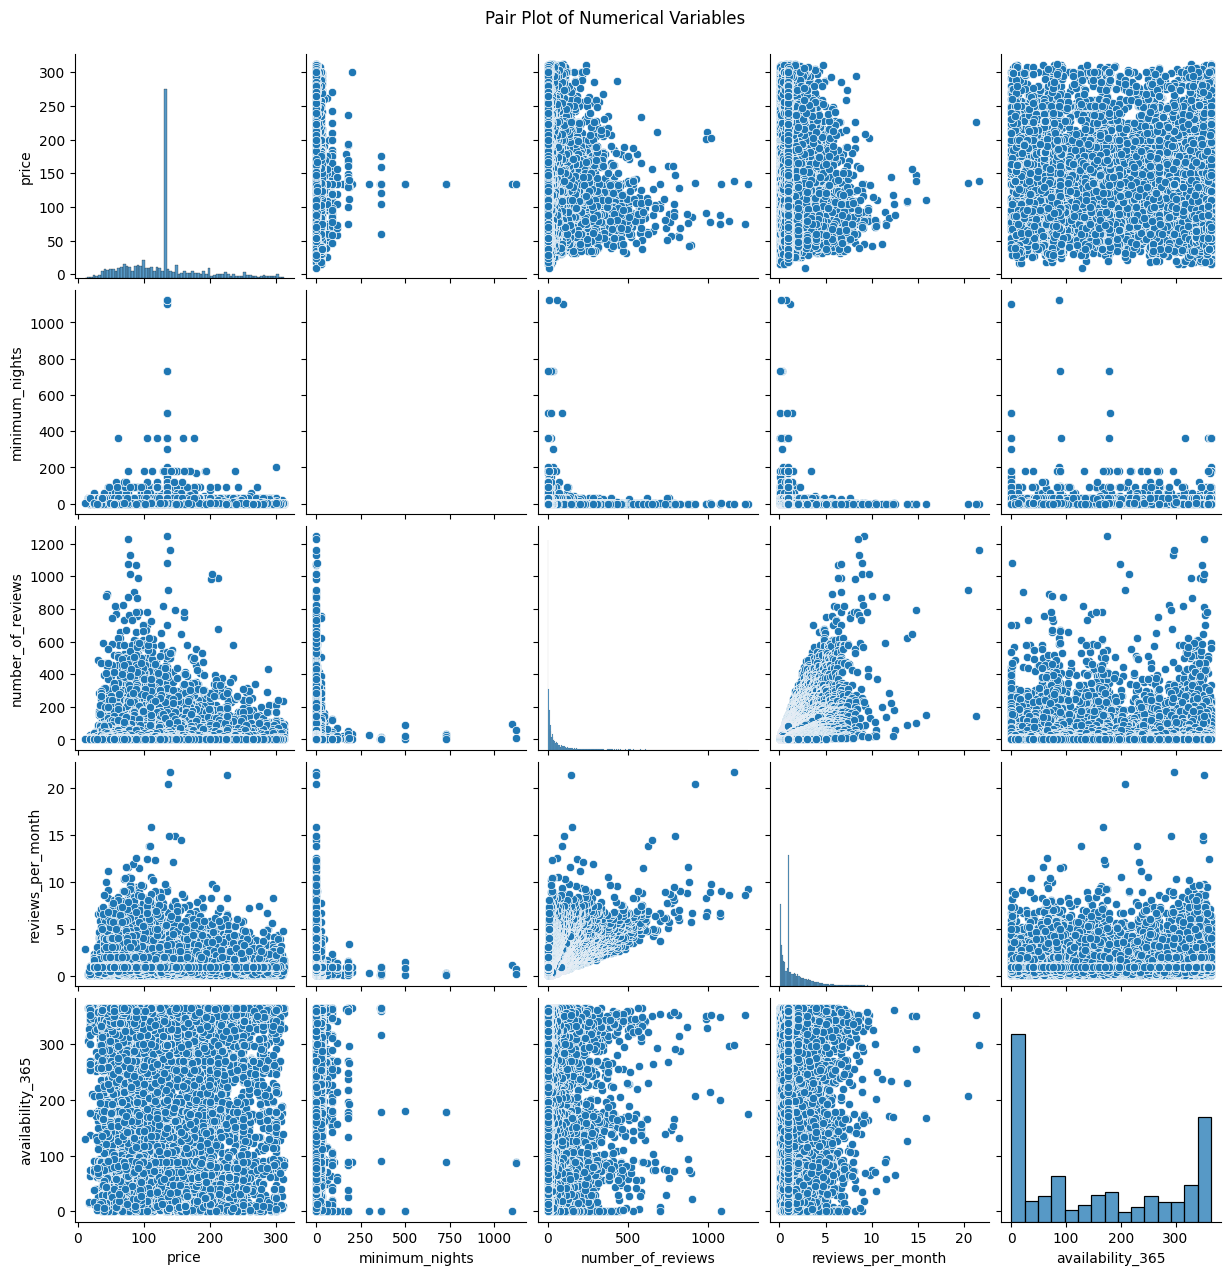

In [26]:
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
sns.pairplot(listings_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

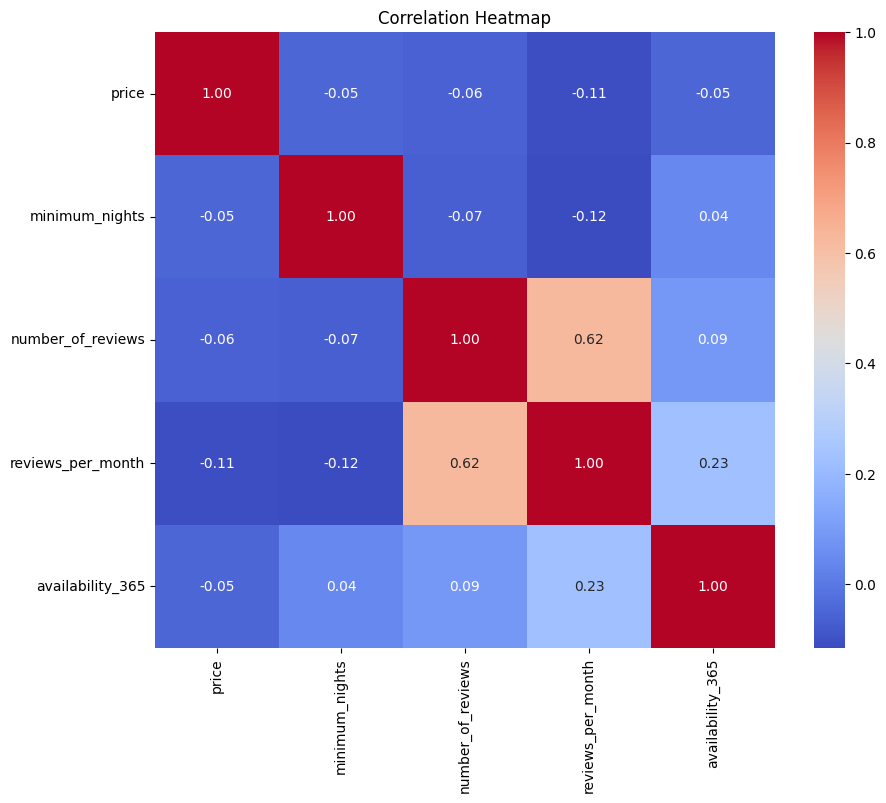

In [ ]:
corr_matrix = listings_cleaned[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

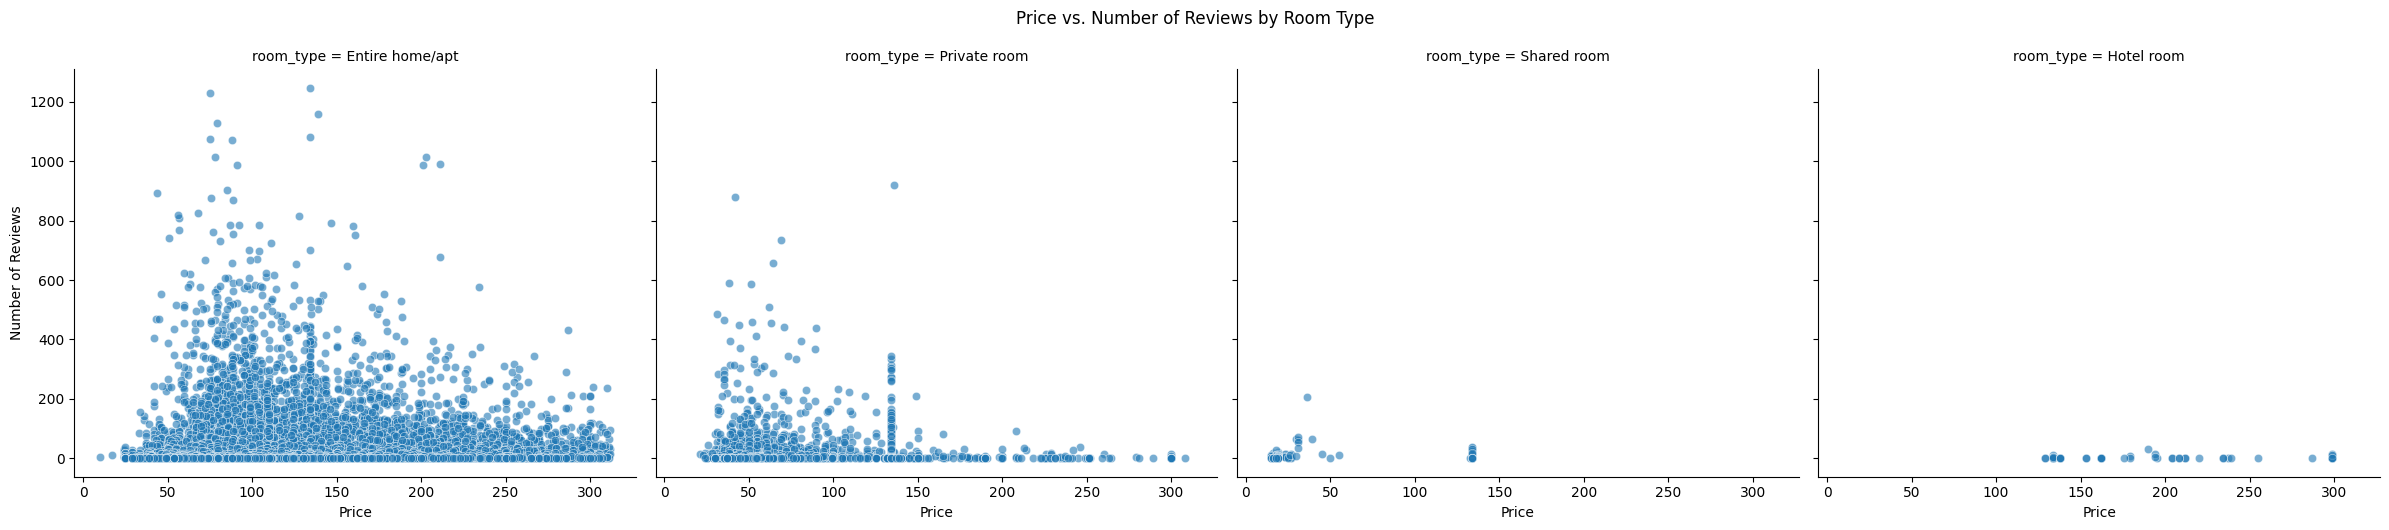

In [28]:
# Faceted scatter plot: Price vs. Number of Reviews, faceted by Room Type
g = sns.FacetGrid(listings_cleaned, col='room_type', height=5, aspect=1.2)
g.map(sns.scatterplot, 'price', 'number_of_reviews', alpha=0.6)
g.set_axis_labels('Price', 'Number of Reviews')
g.fig.suptitle('Price vs. Number of Reviews by Room Type', y=1.05)
plt.show()
